<a href="https://colab.research.google.com/github/janhvipawar01/LGMVIP-DataScience/blob/main/Intermediate%20Task_1_Exploratory_Data_Analysis_on_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LetsGrowMore**

## **Intermediate level task**

## Task - 1 : Exploratory Data Analysis on Terrorism.
Task Details : As a security/defense analyst, we will try to find out the hot zone of terrorism.

**AUTHOR : JANHVI VIJAY PAWAR**


Dataset:
https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,51,53,54,55,57,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.shape

(131468, 135)

In [ ]:
df.shape

(131468, 135)

In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.314680e+05,131468.000000,131468.000000,131468.000000,131468.000000,131468.000000,131468.000000,127199.000000,1.271980e+05,131462.000000,131468.000000,131468.000000,131468.000000,131468.000000,131467.000000,19340.000000,131467.000000,131468.000000,131468.000000,131468.000000,3729.000000,221.000000,131468.000000,125129.000000,130588.000000,6706.000000,6278.000000,6401.000000,754.000000,684.000000,726.000000,131088.000000,755.000000,98.000000,131468.000000,60353.000000,61979.000000,65348.000000,8864.000000,690.000000,290.000000,96.000000,58.000000,4513.000000,131468.000000,116150.000000,8129.000000,7269.000000,1075.00000,973.000000,73.000000,70.000000,124050.000000,67031.000000,65661.000000,120041.000000,66780.000000,64407.000000,131468.000000,47376.000000,2.230000e+04,131289.000000,8911.000000,8856.000000,2629.000000,4897.000000,72720.000000,1.070000e+03,2.840000e+02,4.950000e+02,273.000000,6330.000000,5738.000000,131467.000000,131467.000000,131467.000000,131467.000000
mean,1.997795e+11,1997.729645,6.355760,15.380640,0.036047,134.711154,6.701425,22.441231,-6.585345e+02,1.434643,0.066389,0.987647,0.992485,0.892985,-0.796595,1.292968,0.121833,0.910838,0.025915,3.133957,3.407080,4.660633,8.173601,46.419751,127.457270,9.683120,52.547467,133.354945,9.377984,53.203216,134.181818,0.099376,0.328477,0.367347,0.002183,-54.213643,-2.412091,-0.068541,7.055280,0.205797,7.506897,0.583333,7.448276,-6.806337,6.377560,10.911976,6.568336,10.622919,6.75814,11.247688,6.246575,10.842857,2.251294,0.076069,0.282603,3.236403,0.062025,0.042651,-0.242188,3.323560,3.494697e+05,0.060744,4.042981,-0.512534,-26.806390,-20.705942,-0.143372,3.363354e+06,1.146753e+06,5.512328e+05,449.410256,4.463981,-23.601429,-4.634159,-4.585790,0.101349,-3.971377
std,1.246305e+09,12.464271,3.416323,8.829476,0.186407,117.777697,3.012782,20.113816,2.416552e+05,1.028178,0.293159,0.110455,0.086364,0.309133,2.829344,0.610424,0.327094,0.284979,0.158883,1.845624,2.094601,2.223375,6.652314,31.580698,86.834742,5.848926,26.053888,128.959166,5.885728,26.935766,142.533229,0.299167,0.469971,0.484561,0.046672,288.012590,16.022004,1.398873,2.974883,1.501222,3.218935,0.495595,3.424230,3.918291,2.100037,6.696275,1.945122,7.499087,2.05536,8.116393,1.507212,8.192672,10.610742,7.511514,3.106114,41.404750,4.036171,0.973310,2.822441,0.507072,2.049980e+07,0.358257,236.541344,8.240653,93.390481,138.586088,1.187581,3.269879e+07,9.941428e+06,2.901511e+06,4131.352477,2.060711,59.959171,4.544334,4.608218,0.651515,4.686406
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.00000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.9

In [ ]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
df=df[['iyear','imonth','iday','country_txt','city','region_txt','latitude','longitude','extended','target1','success','suicide','attacktype1_txt','targtype1_txt','gname','weaptype1_txt','nkill','nwound']]


In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'region','attacktype1_txt':'AttackType','target1':'Target',
                  'nkill':'Killed','nwound':'Wounded',
                   'targtype1_txt':'Target_Type','gname':'group_name','weaptype1_txt':'Weapon_type','motive':'Motive',
                  'extended':'Extended','latitude':'Latitude','longitude':'Longitude', 'target1': 'Target','city':'City'}, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head()

,Year,Month,Day,Country,City,region,Latitude,Longitude,Extended,Target,success,suicide,AttackType,Target_Type,group_name,Weapon_type,Killed,Wounded
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,18.456792,-69.951164,0,Julio Guzman,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,Mexico city,North America,19.371887,-99.086624,0,"Nadine Chaval, daughter",1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Unknown,Southeast Asia,15.478598,120.599741,0,Employee,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Athens,Western Europe,37.997490,23.762728,0,U.S. Embassy,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,0,U.S. Consulate,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [ ]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
City             434
region             0
Latitude        4269
Longitude       4270
Extended           0
Target           636
success            0
suicide            0
AttackType         0
Target_Type        0
group_name         0
Weapon_type        0
Killed          7418
Wounded        11427
dtype: int64

In [ ]:
df['Latitude']=df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude']=df['Longitude'].fillna(df['Longitude'].mean())
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df['Target']=df["Target"].fillna(0)

In [ ]:
df.isnull().sum()

Year             0
Month            0
Day              0
Country          0
City           434
region           0
Latitude         0
Longitude        0
Extended         0
Target           0
success          0
suicide          0
AttackType       0
Target_Type      0
group_name       0
Weapon_type      0
Killed           0
Wounded          0
dtype: int64

### **DATA VISUALIZATION**

In [ ]:
df.corr()

,Year,Month,Day,Latitude,Longitude,Extended,success,suicide,Killed,Wounded
Year,1.000000,-0.040569,0.006738,0.152387,0.003675,0.079590,-0.024006,0.141670,0.014874,0.024915
Month,-0.040569,1.000000,0.005016,-0.025800,-0.004562,-0.004670,0.002150,0.001554,0.004280,0.004026
Day,0.006738,0.005016,1.000000,-0.000385,-0.002687,-0.003849,-0.003126,0.003921,-0.001789,-0.000403
Latitude,0.152387,-0.025800,-0.000385,1.000000,0.001442,-0.021445,-0.068640,0.071657,-0.021794,0.015001
Longitude,0.003675,-0.004562,-0.002687,0.001442,1.000000,0.000531,-0.000882,0.000485,-0.000780,0.000215
Extended,0.079590,-0.004670,-0.003849,-0.021445,0.000531,1.000000,0.057782,-0.028716,-0.000253,-0.008307
success,-0.024006,0.002150,-0.003126,-0.068640,-0.000882,0.057782,1.000000,0.000634,0.054819,0.017917
suicide,0.141670,0.001554,0.003921,0.071657,0.000485,-0.028716,0.000634,1.000000,0.137210,0.102350
Killed,0.014874,0.004280,-0.001789,-0.021794,-0.000780,-0.000253,0.054819,0.137210,1.000000,0.544950
Wounded,0.024915,0.004026,-0.000403,0.015001,0.000215,-0.008307,0.017917,0.102350,0.544950,1.000000


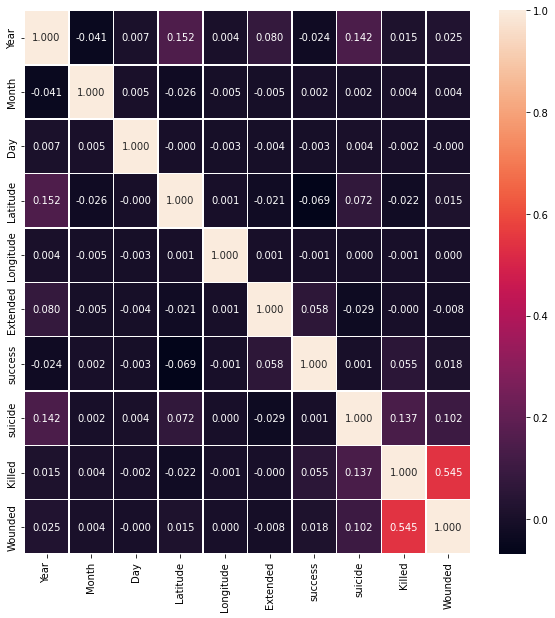

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.3f')

In [ ]:
df["Total_affected"]=df["Killed"]+df["Wounded"]

In [ ]:
df.head()

,Year,Month,Day,Country,City,region,Latitude,Longitude,Extended,Target,success,suicide,AttackType,Target_Type,group_name,Weapon_type,Killed,Wounded,Total_affected
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,18.456792,-69.951164,0,Julio Guzman,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,1.0
1,1970,0,0,Mexico,Mexico city,North America,19.371887,-99.086624,0,"Nadine Chaval, daughter",1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Unknown,Southeast Asia,15.478598,120.599741,0,Employee,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Athens,Western Europe,37.997490,23.762728,0,U.S. Embassy,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0,0.0,0.0
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,0,U.S. Consulate,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0,0.0,0.0


## **1. Yearwise Attacks**

In [ ]:
years = pd.DataFrame(df["Year"].value_counts())
years.head(10)

,Year
2013,12036
2012,8522
2014,6132
2011,5076
1992,5071
2010,4826
2008,4805
2009,4721
1991,4683
1989,4324


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


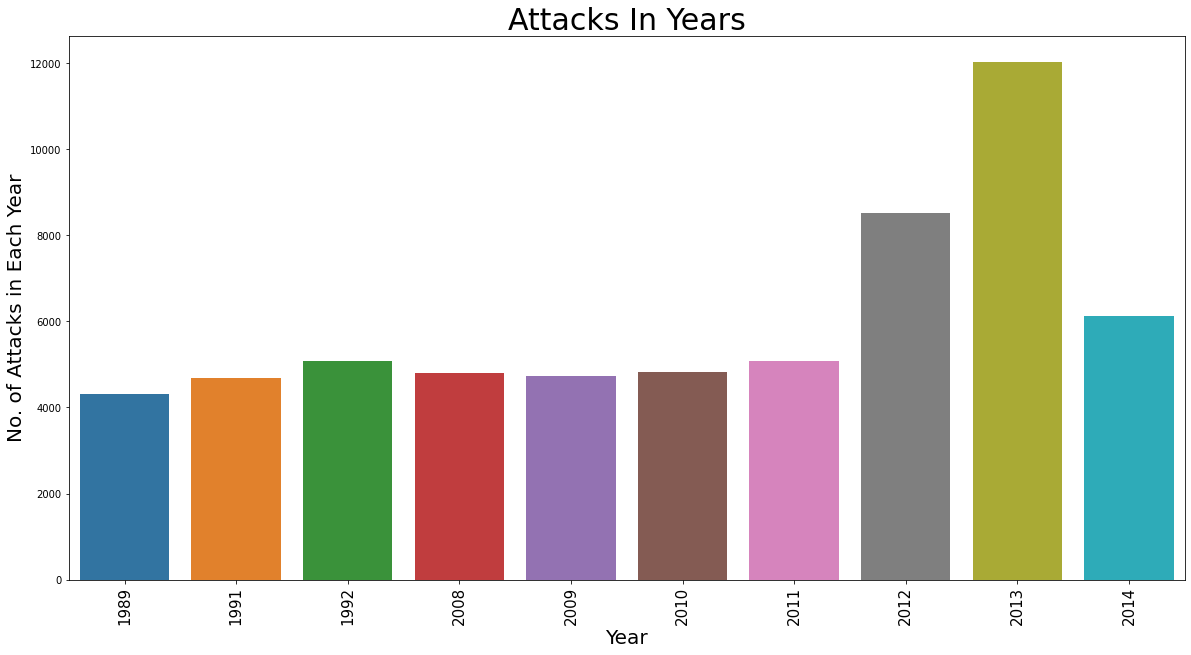

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Year'].value_counts()[:10].index,df['Year'].value_counts()[:10].values)
plt.title('Attacks In Years',fontsize =30)
plt.xlabel('Year',fontsize =20)
plt.ylabel('No. of Attacks in Each Year',fontsize =20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **2. Number of killed in each year**

In [ ]:
year_s=df[["Year",'Killed']].groupby("Year").sum().sort_values (by = 'Killed',ascending=False)
year_s.head(10)

,Killed
Year,
2013,22273.0
2012,15497.0
2007,12824.0
2014,12064.0
1997,10924.0
1984,10450.0
1992,9742.0
1983,9444.0
2006,9380.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


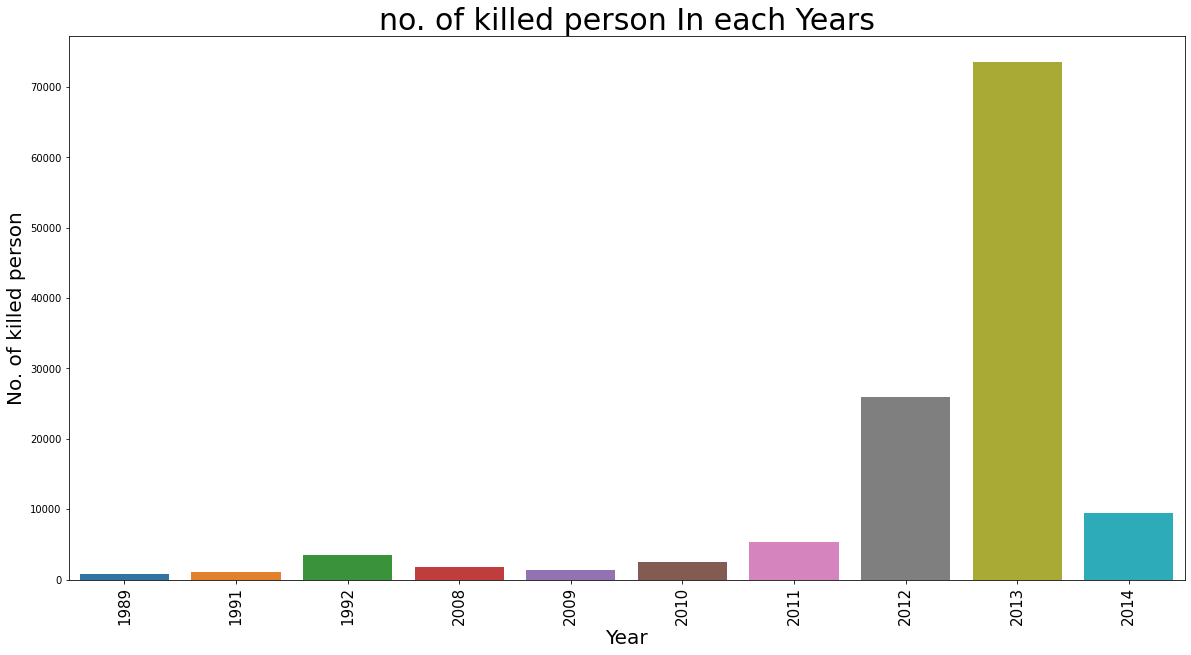

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Year'].value_counts()[:10].index,df['Killed'].value_counts()[:10].values)
plt.title('no. of killed person In each Years',fontsize =30)
plt.xlabel('Year',fontsize =20)
plt.ylabel('No. of killed person',fontsize =20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **3. Country wise Attacks - Top 10**

In [ ]:
country = pd.DataFrame(df["Country"].value_counts())
print(" Name of the Countries (most affected by the attacks) : \n")
country.head(10)

 Name of the Countries (most affected by the attacks) : 



,Country
Iraq,13862
Pakistan,10267
India,8596
Colombia,7785
Afghanistan,6511
Peru,6070
El Salvador,5320
United Kingdom,4829
Philippines,4449
Spain,3237


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


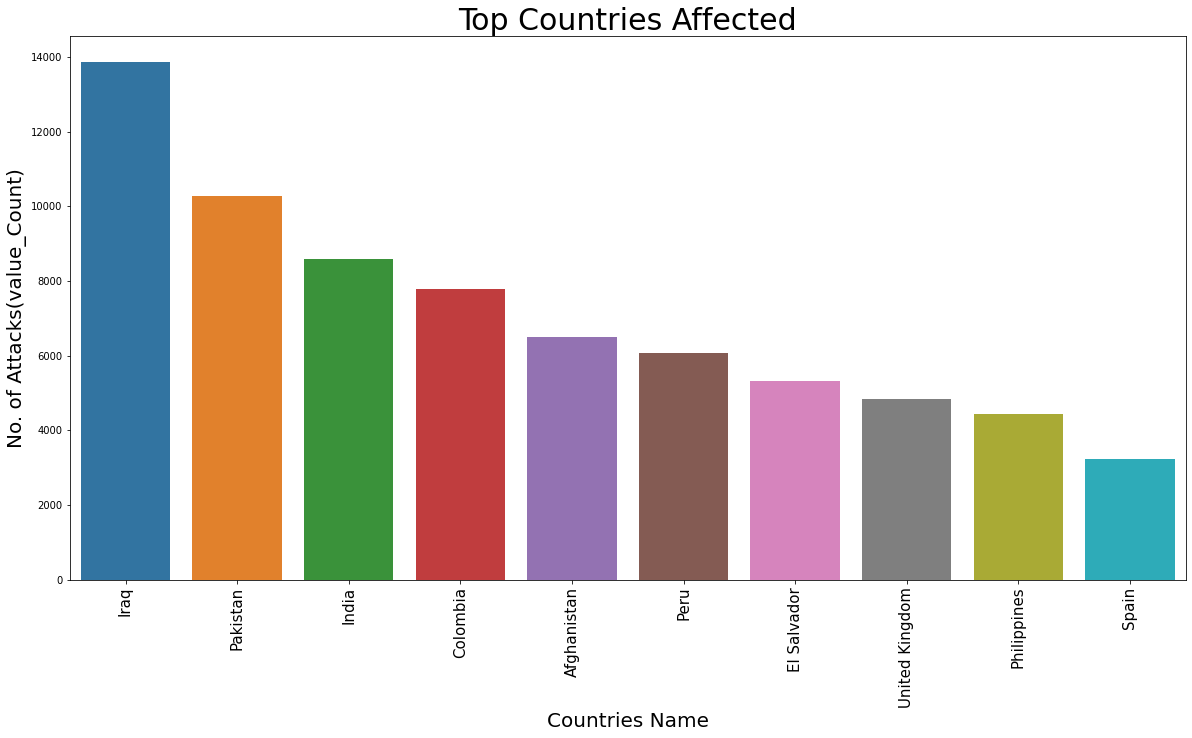

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
plt.title('Top Countries Affected',fontsize =30)
plt.xlabel('Countries Name',fontsize =20)
plt.ylabel('No. of Attacks(value_Count)',fontsize =20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **4. Region wise Attacks - Top 10**

In [ ]:
region = pd.DataFrame(df["region"].value_counts())
print("Regions affected most by the attacks: \n")
region.head()

Regions affected most by the attacks: 



,region
Middle East & North Africa,30262
South Asia,30230
South America,18275
Western Europe,15598
Central America & Caribbean,10332


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


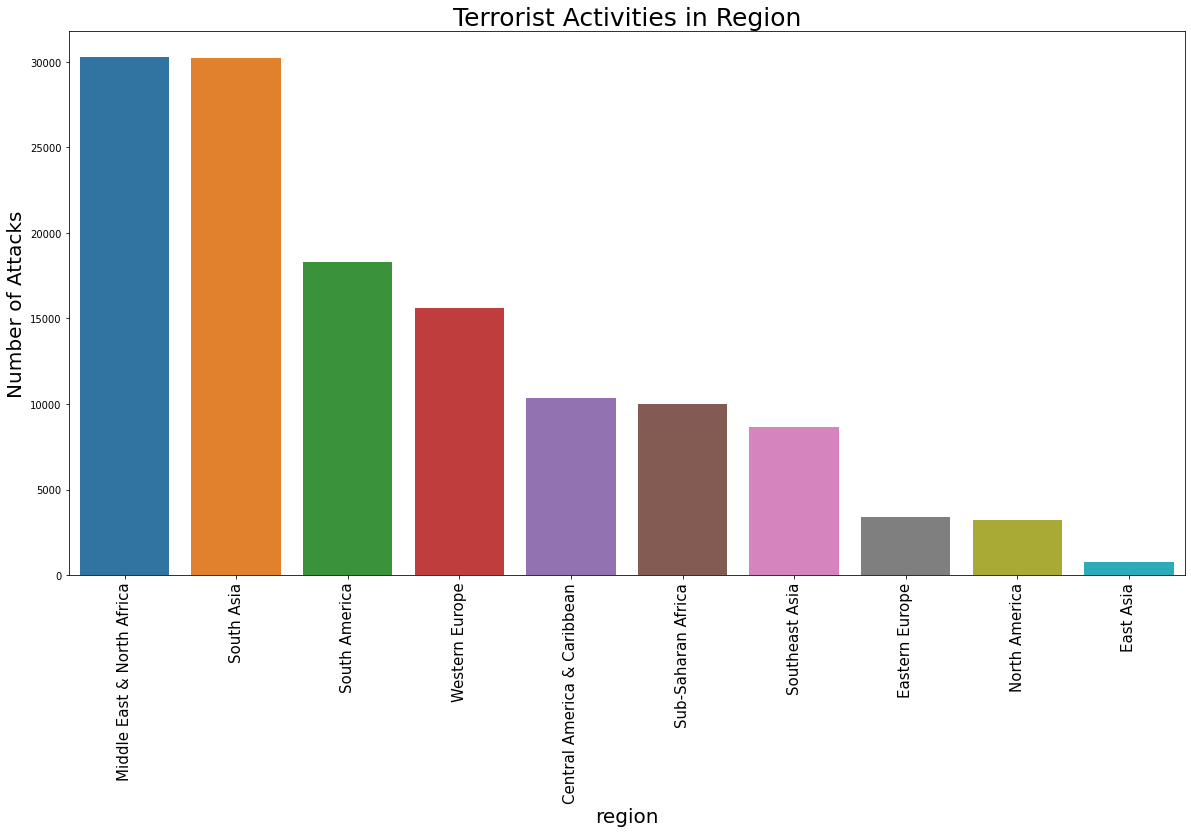

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['region'].value_counts()[:10].index,df['region'].value_counts()[:10].values)
plt.title('Terrorist Activities in Region',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("region",fontsize=20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **5. City wise Attacks - Top 10**

In [ ]:
City= pd.DataFrame(df['City'].value_counts().drop("Unknown"))
print(" Name of the City (most affected by the attacks) : \n")
City.head(10)

 Name of the City (most affected by the attacks) : 



,City
Baghdad,4672
Lima,2357
Karachi,2175
Belfast,2051
Santiago,1599
San Salvador,1558
Mosul,1397
Istanbul,966
Bogota,958
Athens,926


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


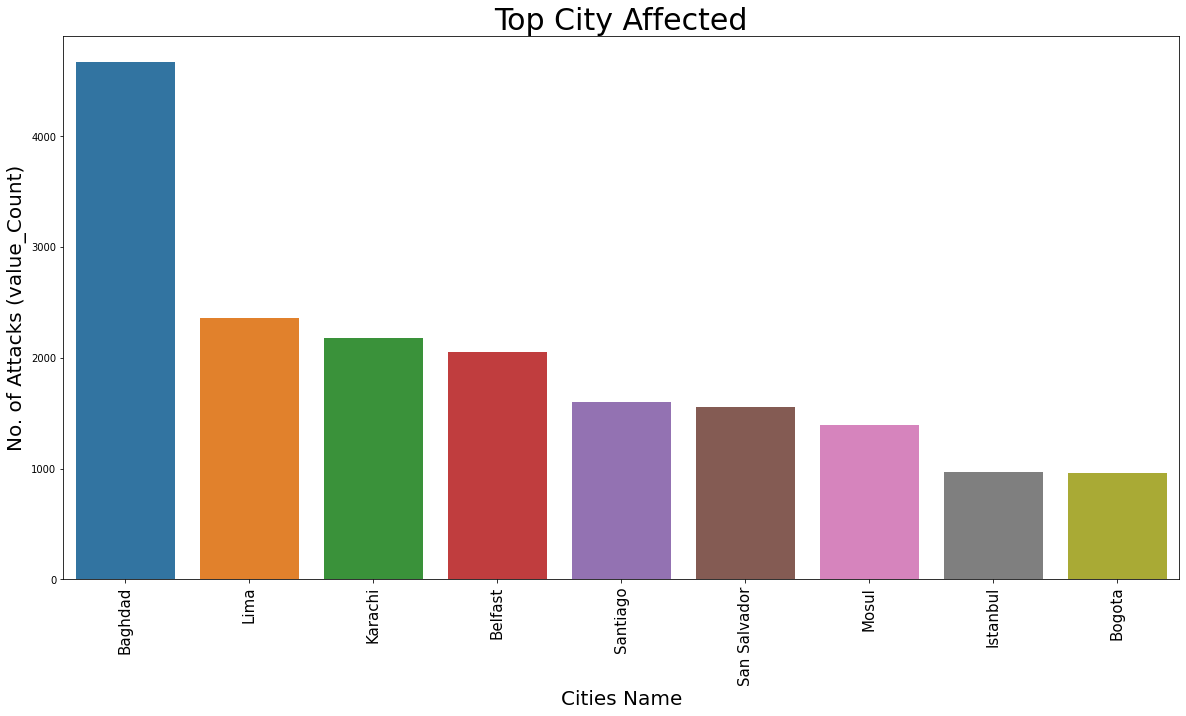

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df['City'].value_counts()[1:10].index,df['City'].value_counts()[1:10].values)
plt.title('Top City Affected',fontsize =30)
plt.xlabel('Cities Name',fontsize =20)
plt.ylabel('No. of Attacks (value_Count)',fontsize =20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **6. Attack Type**

In [ ]:
attacks = pd.DataFrame(df["AttackType"].value_counts())
attacks

,AttackType
Bombing/Explosion,62957
Armed Assault,31600
Assassination,16228
Facility/Infrastructure Attack,7728
Hostage Taking (Kidnapping),6954
Unknown,4060
Hostage Taking (Barricade Incident),740
Unarmed Assault,713
Hijacking,488


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


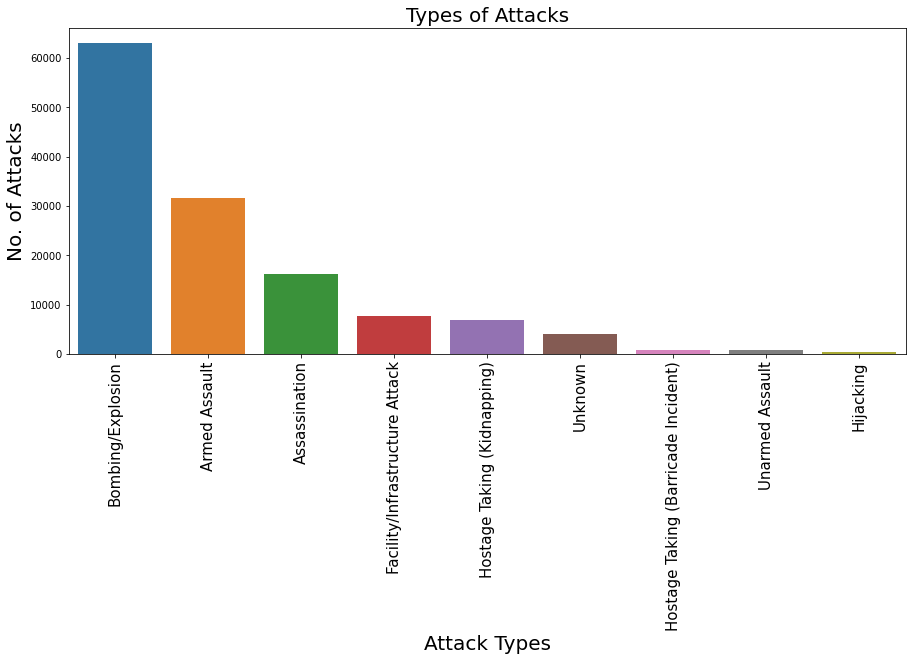

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(df['AttackType'].value_counts()[:10].index,df['AttackType'].value_counts()[:10].values)
plt.title("Types of Attacks",fontsize= 20)
plt.xlabel("Attack Types",fontsize=20)
plt.xticks(fontsize=15,rotation = 90)
plt.ylabel("No. of Attacks",fontsize=20)
plt.show()

## **7. Target Type**

In [ ]:
target = pd.DataFrame(df['Target_Type'].value_counts())
target

,Target_Type
Private Citizens & Property,29178
Police,17557
Military,17556
Government (General),17311
Business,17106
Transportation,5790
Utilities,5102
Educational Institution,3454
Religious Figures/Institutions,3216
Government (Diplomatic),3139


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


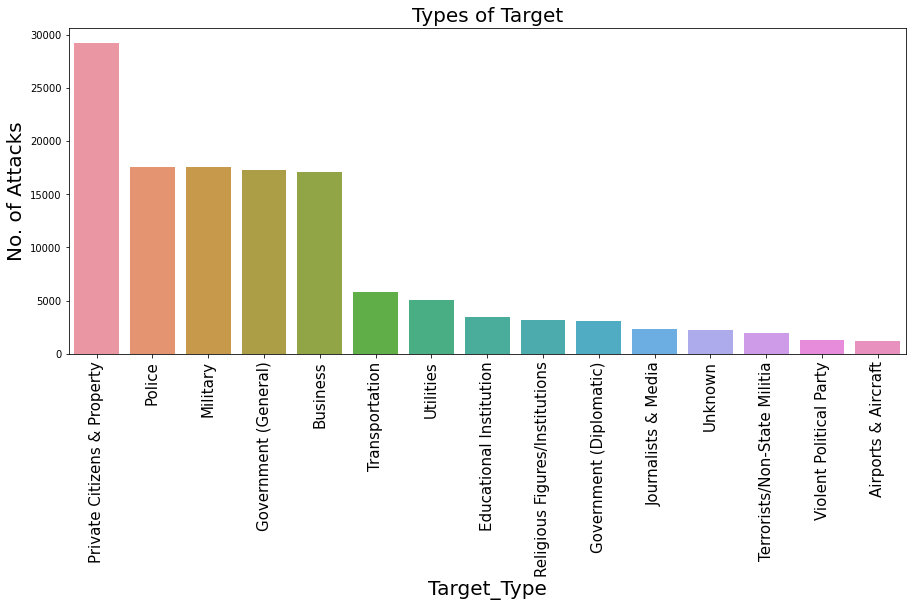

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(df['Target_Type'].value_counts()[:15].index,df['Target_Type'].value_counts()[:15].values)
plt.title("Types of Target",fontsize= 20)
plt.xlabel('Target_Type',fontsize=20)
plt.xticks(fontsize=15,rotation = 90)
plt.ylabel("No. of Attacks",fontsize=20)
plt.show()

## **8. Weapon Type**

In [ ]:
weapon = pd.DataFrame(df['Weapon_type'].value_counts())
weapon

,Weapon_type
Explosives,65035
Firearms,44761
Unknown,9906
Incendiary,8740
Melee,2473
Chemical,227
Sabotage Equipment,111
Other,78
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",57
Biological,35


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


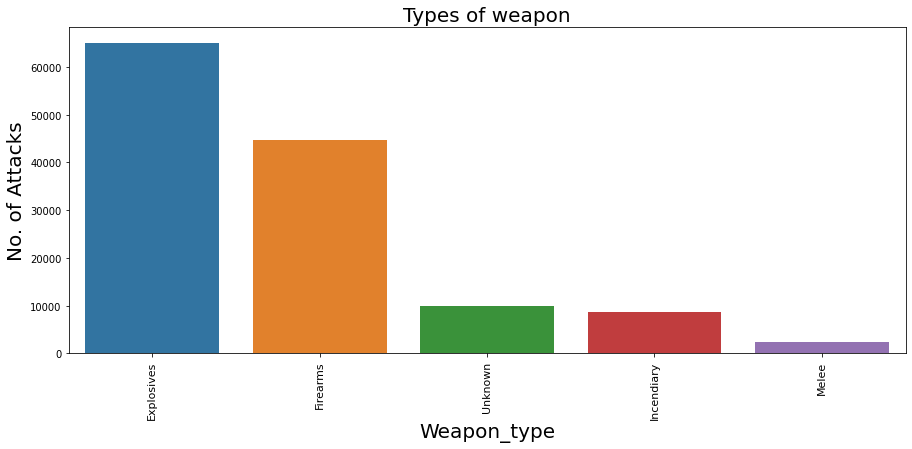

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(df['Weapon_type'].value_counts()[:5].index,df['Weapon_type'].value_counts()[:5].values)
plt.title("Types of weapon",fontsize= 20)
plt.xlabel('Weapon_type',fontsize=20)
plt.xticks(fontsize=11,rotation = 90)
plt.ylabel("No. of Attacks",fontsize=20)
plt.show()

## **9. Terrorist Group wise Attacks (Top 10)**

In [ ]:
Group=pd.DataFrame(df["group_name"].value_counts().drop('Unknown'))
Group.head(10)

,group_name
Shining Path (SL),4539
Taliban,3544
Farabundo Marti National Liberation Front (FMLN),3351
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2283
Basque Fatherland and Freedom (ETA),2024
New People's Army (NPA),1710
Liberation Tigers of Tamil Eelam (LTTE),1606
Communist Party of India - Maoist (CPI-Maoist),1549
Kurdistan Workers' Party (PKK),1398


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


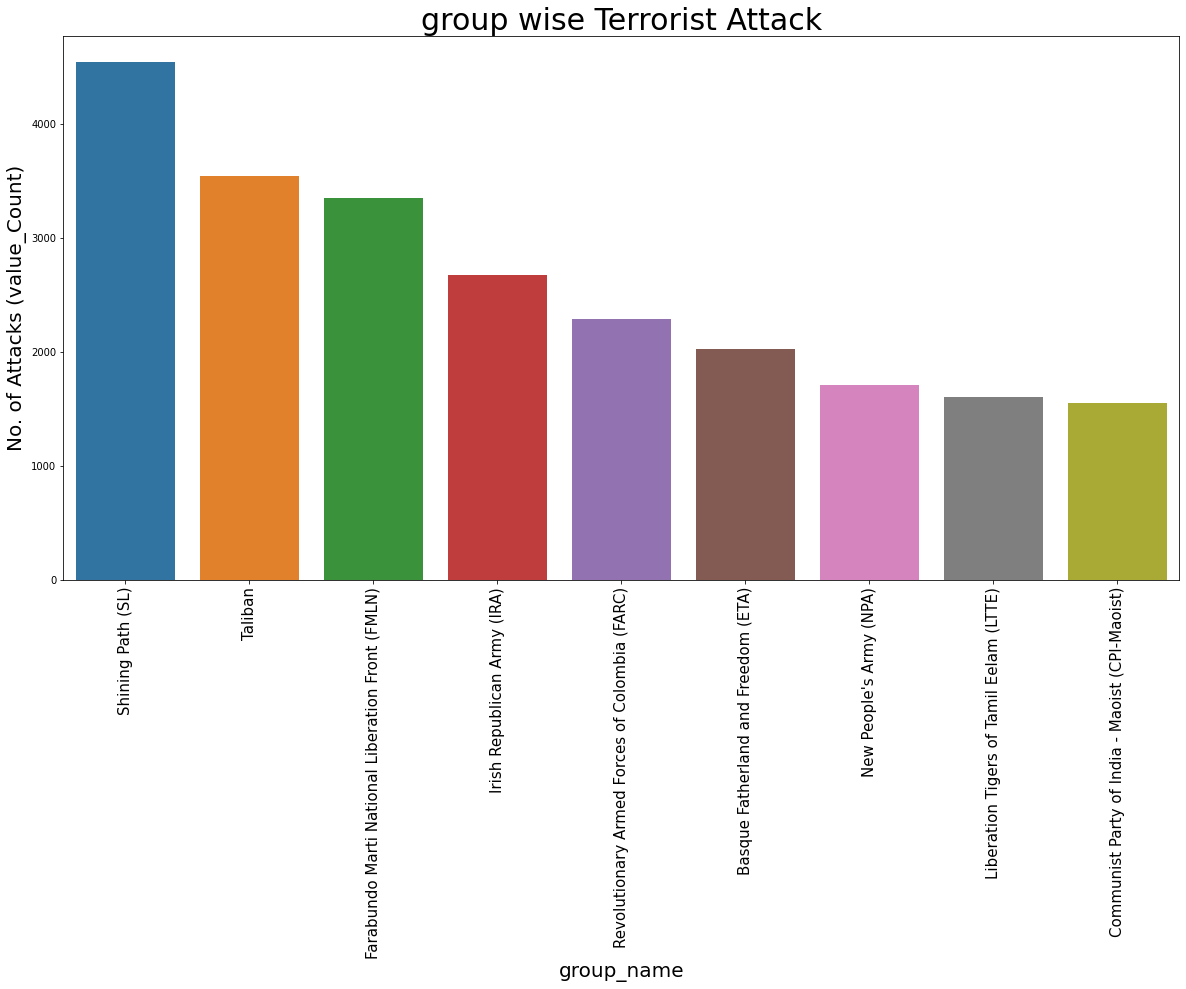

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(df["group_name"].value_counts()[1:10].index,df["group_name"].value_counts()[1:10].values)
plt.title('group wise Terrorist Attack',fontsize =30)
plt.xlabel("group_name",fontsize =20)
plt.ylabel('No. of Attacks (value_Count)',fontsize =20)
plt.xticks(fontsize=15,rotation = 90)
plt.show()

## **10. Group and Country wise (Top10)**

In [ ]:
gcv=df[["group_name","Country"]].value_counts().drop("Unknown")
gcv.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


group_name                                        Country       
Shining Path (SL)                                 Peru              4525
Taliban                                           Afghanistan       3495
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2265
Basque Fatherland and Freedom (ETA)               Spain             1975
New People's Army (NPA)                           Philippines       1708
Liberation Tigers of Tamil Eelam (LTTE)           Sri Lanka         1596
Communist Party of India - Maoist (CPI-Maoist)    India             1548
National Liberation Army of Colombia (ELN)        Colombia          1305
Kurdistan Workers' Party (PKK)                    Turkey            1219
Al-Shabaab                                        Somalia           1023
Tehrik-i-Taliban Pakistan (TTP)                   Pakistan 

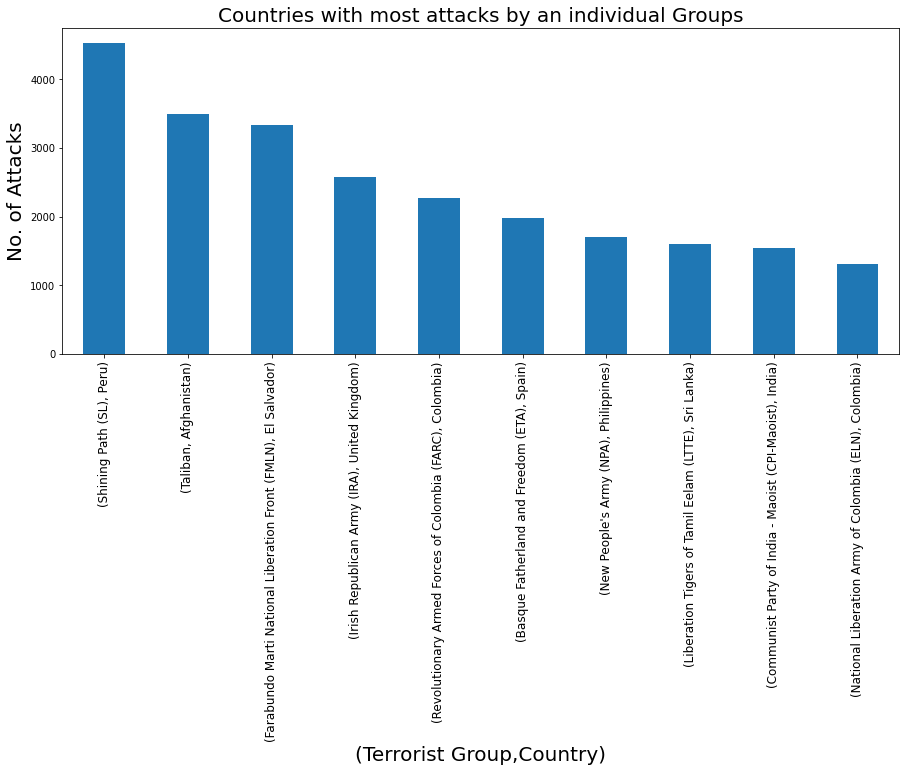

In [ ]:
gcv.head(10).plot(kind ="bar",figsize=(15,6))
plt.title("Countries with most attacks by an individual Groups",fontsize= 20)
plt.xlabel("(Terrorist Group,Country)",fontsize=20)
plt.xticks(fontsize=12)
plt.ylabel("No. of Attacks",fontsize=20)
plt.show()

# **Conclusion and Overall Result:**

Year with the most terrorist attacks: **2013**

Year with maximum no. of killed person : **2013**

Country with the most terrorist attacks: **Iraq**

Region with the most terrorist attacks: **Middle East & North Africa**

City with the most terrorist attacks: **Baghdad**

Most Attack Types: **Bombing/Explosion**

Most Target Types : **Private Citizens & Property**

Most weapon Types : **Explosives**

Group with the most terrorist attacks: **Shining Path (SL), peru**